# Sampling strategies for networks and estimation in hidden populations

Installation of the main packages

In [2]:
# you have to first use install.packages('igraph') and install.packages('ggplot2')
library('igraph')
library('ggplot2')
library('igraphdata')

# Sampling strategies 

## Average degree estimation

 *Random_sampling(g,nb.sample)* samples uniformly *nb.sample* nodes in a graph defined by the adjacency matrix g. When a node i is sampled, it will also provide the information of its degree.

In [3]:
Random_sampling<-function(g,nb.sample){
    I<-dim(g)[1]
    nodes <- sample(c(1:I),nb.sample)
    degree.vec<-c()
    for(i in nodes){
        degree.vec<-c(degree.vec,sum(g[i,]))
    }
    return(list(nodes,degree.vec))
}

 *Degree_Random_sampling(g,nb.sample)* which samples *nb.sample nodes* and where the probability of sampling a node $i$ is given by $\displaystyle\frac{d_i}{\sum_{j=1}^Id_j}$, where $d_i$ is the degree of node $i$. When a node $i$ is sampled, it will also provide the information of its degree.

In [4]:
Degree_Random_sampling<-function(g,nb.sample){
    I<-dim(g)[1]
    deg.vector<-colSums(g)
    nodes <- sample(c(1:I),nb.sample,replace=TRUE, prob = deg.vector/sum(deg.vector))
    degree.vec<-c()
    for(i in nodes){
        degree.vec<-c(degree.vec,sum(g[i,]))
    }
    return(list(nodes,degree.vec))
}

*Random_walk_Random_sampling(g,nb.sample)*  samples *nb.sample nodes* according to a simple random walk. 

Reminder: The random walk starts to a node sampled uniformly at random. More precisely if $g$ is the adjacency matrix of the graph with $I$ nodes, the simple random on the graph defined by $g$ is the Markov chain with:
- the state space equal to $\{1,\ldots,I\}$;
- the transition matrix $P$ given by:
$$ P(i,j)=\left\{\begin{array}{ll}
\frac{1}{\text{degree}(i)}&\text{if }g(i,j)=1,\\
0&\text{otherwise, }
\end{array}\right. \forall i,j\in\{1,\ldots,I\}. $$


In [4]:
Random_walk_Random_sampling<-function(g,nb.sample){
    I<-dim(g)[1]
    # Initialization
    nodes<-c()
    i0<- sample(c(1:I),1,replace=TRUE)# initialization of the random walk
    nodes<-c(nodes,i0)
    degree.vec<-c()
    degree.vec<-c(degree.vec,sum(g[i0,]))
    for(n in 1:nb.sample){
        i1 <-sample(c(1:I),1,replace=TRUE,prob = g[i0,]/sum(g[i0,])) # Sampling the new state 
        if(sum(nodes==i1)>0){
            nodes <- nodes
            degree.vec <- degree.vec
        }
        else{
            nodes <- c(nodes,i1)
            degree.vec <- c(degree.vec,sum(g[i1,]))
        }
        i0 <- i1
    }
    return(list(nodes,degree.vec))
}

Simuation on  Erdos-Renyi network with n=100 and p=0.06 using the function *erdos.renyi.game* .

[1] "average degree is "


[1] 5.96

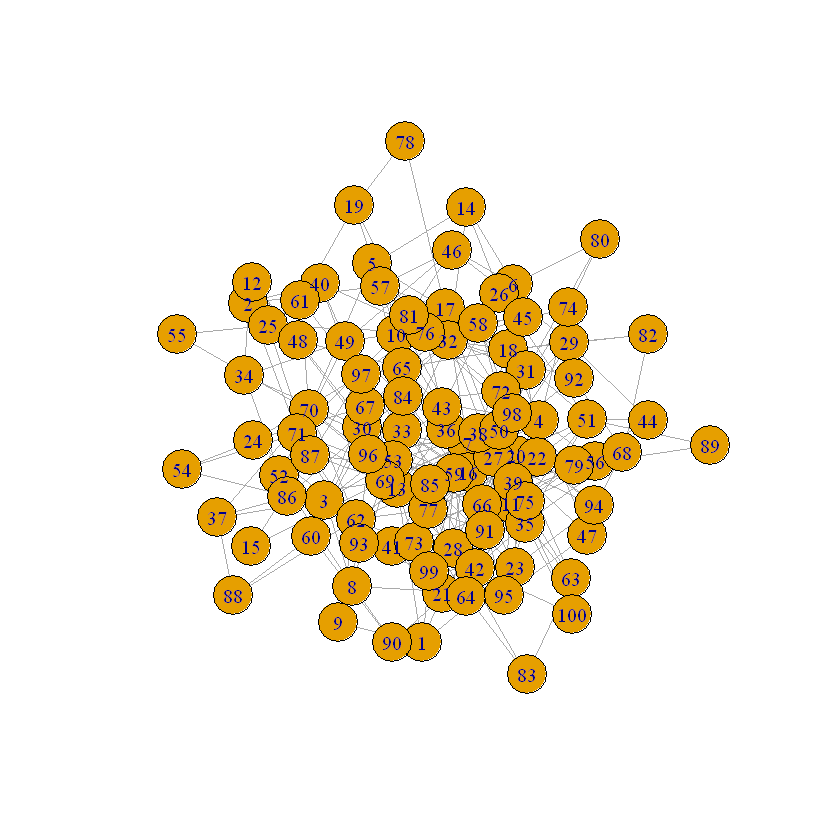

In [5]:
g = erdos.renyi.game(n=100, p.or.m=0.06)
plot(g,type="l")
print('average degree is ')
mean(degree(g))

In [16]:
var(degree(g))/100

[1] 0.05877172

In [6]:
random.sampling.mean<-array(0,c(1,10))
degree.random.sampling.mean<-array(0,c(1,10))
random.walk.random.sampling.mean<-array(0,c(1,10))

for (i in 1:10){
 
    random.sampling.mean[i]<-mean(as.numeric(unlist(Random_sampling(get.adjacency(g), 10)[2])))
    
    degree.random.sampling.mean[i]<-mean(as.numeric(unlist(Degree_Random_sampling(as.matrix(get.adjacency(g)), 10)[2])))
    
    random.walk.random.sampling.mean[i]<-mean(as.numeric(unlist(Random_walk_Random_sampling(get.adjacency(g), 10)[2])))
    
    }

[1] "random sampling"
mean:  5.63 variance:  0.1712222

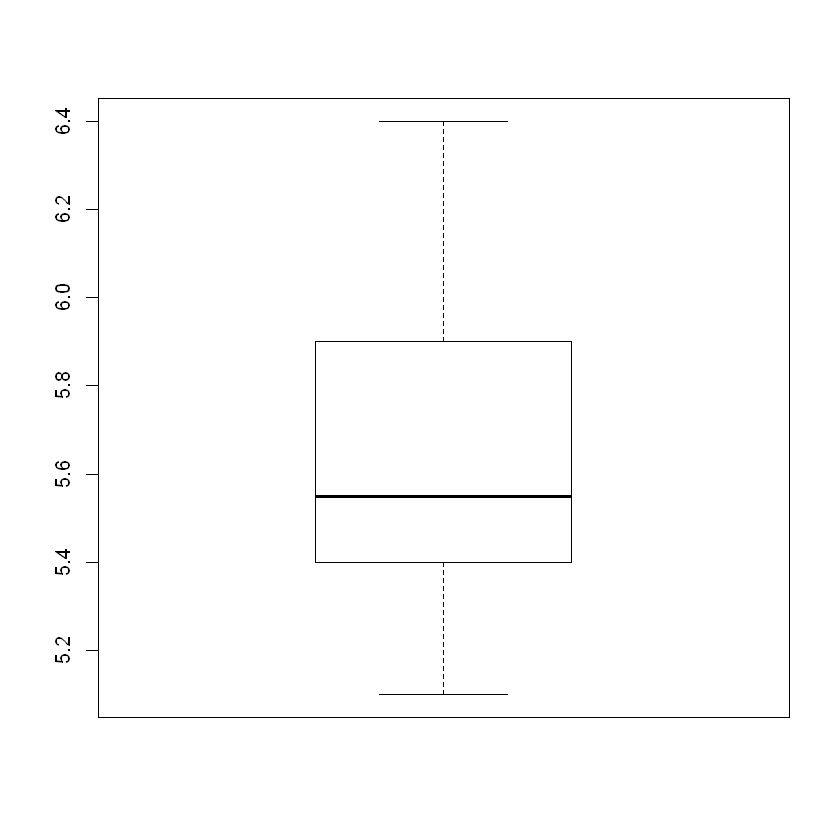

In [7]:
print('random sampling')
cat("mean: ", mean(random.sampling.mean),
   "variance: ",var(as.data.frame.table(random.sampling.mean)$Freq))
boxplot(as.data.frame.table(random.sampling.mean)$Freq)

[1] "degree random sampling"
mean:  6.61 variance:  0.6365556

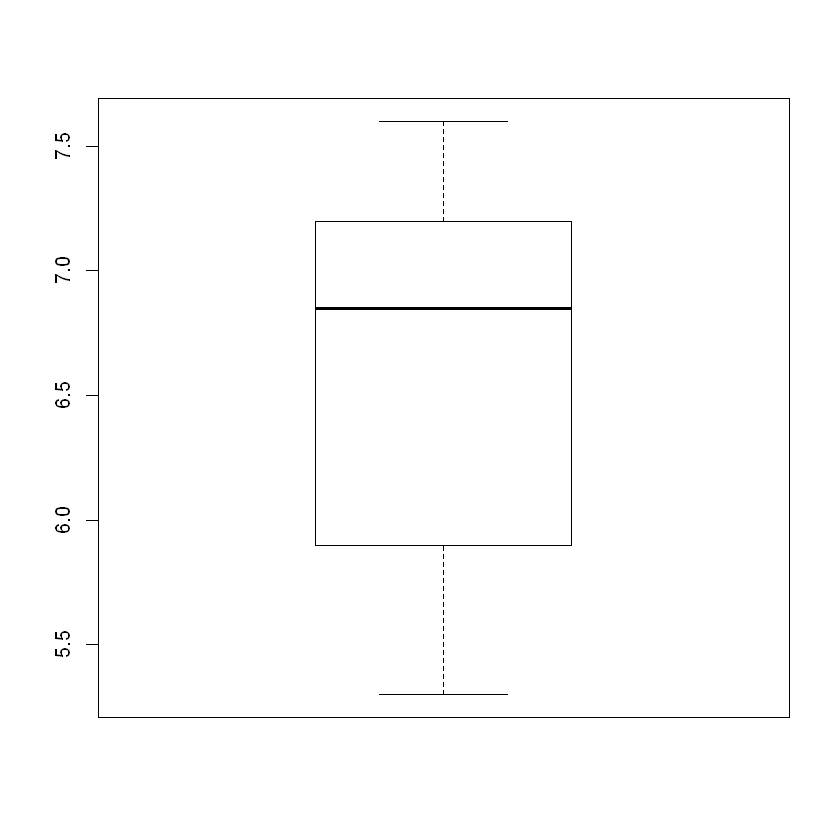

In [12]:
print('degree random sampling')
cat("mean: ", mean(degree.random.sampling.mean),
   "variance: ",var(as.data.frame.table(degree.random.sampling.mean)$Freq))
boxplot(as.data.frame.table(degree.random.sampling.mean)$Freq)

[1] "random walk random sampling"
mean:  7.055303 variance:  0.5051928

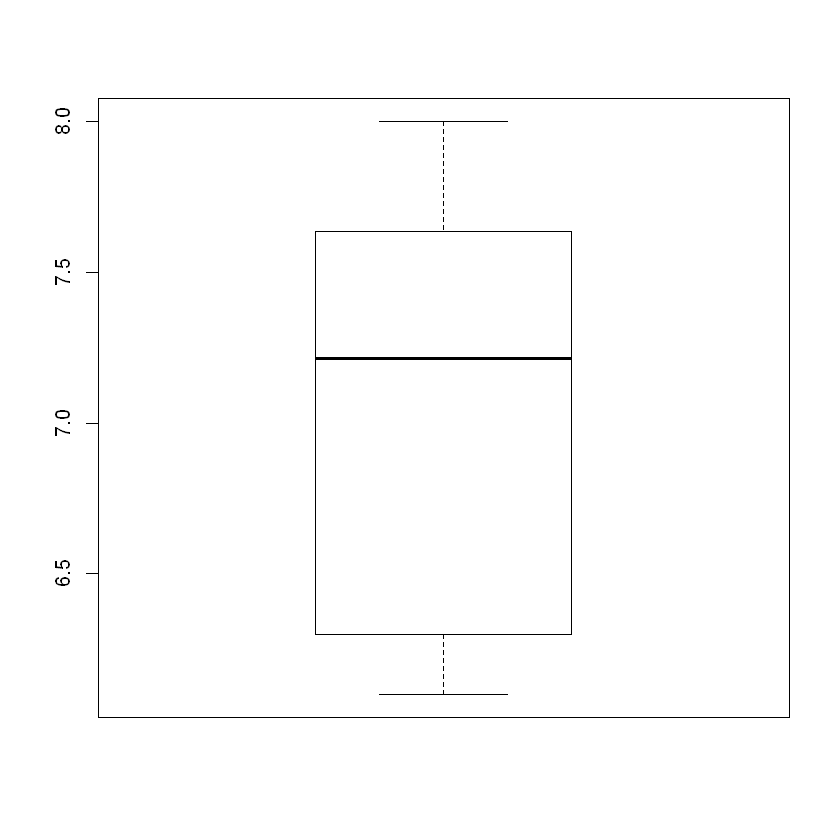

In [13]:
print('random walk random sampling')
cat("mean: ", mean(random.walk.random.sampling.mean),
   "variance: ",var(as.data.frame.table(random.walk.random.sampling.mean)$Freq))
boxplot(as.data.frame.table(random.walk.random.sampling.mean)$Freq)

- We see that all of the estimators are biased, it is because the average degree estimator is a biased estimator.
- The closest estimator of the population's average degree (5.96) is given by random sample (5.63).

let's use Barabasi-Albert model (using the function *sample_pa*). 

[1] "average degree is "


[1] 1.98

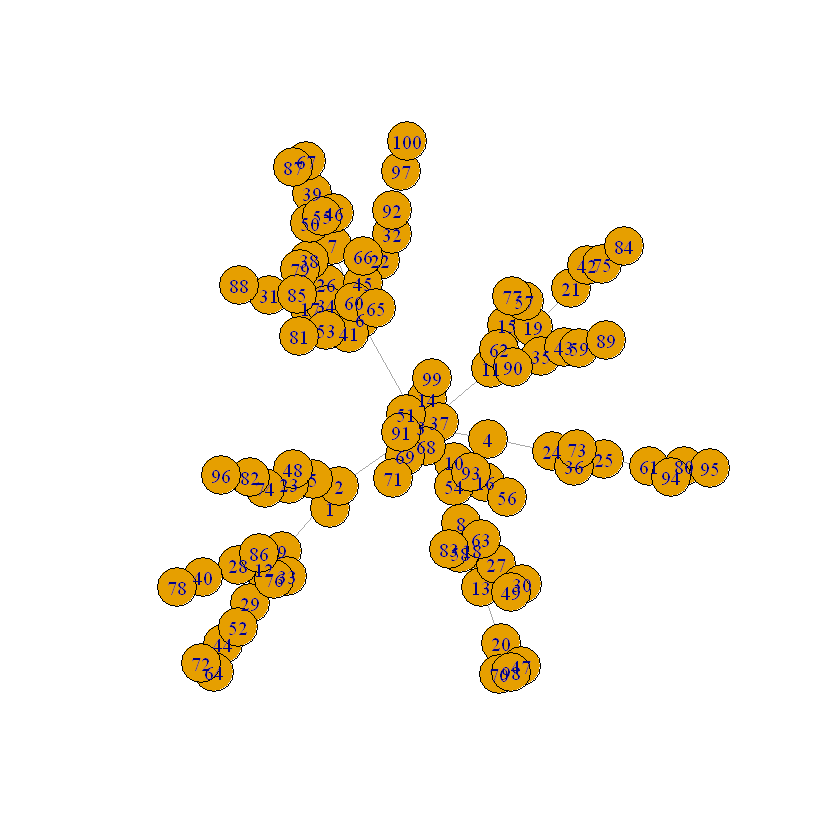

In [32]:
d = sample_pa(100, directed = FALSE)
plot(d,type="l")
print('average degree is ')
mean(degree(d))

In [33]:
random.sampling.mean.b<-array(0,c(1,10))
degree.random.sampling.mean.b<-array(0,c(1,10))
random.walk.random.sampling.mean.b<-array(0,c(1,10))

for (i in 1:10){
 
    random.sampling.mean.b[i]<-mean(as.numeric(unlist(Random_sampling(get.adjacency(d), 10)[2])))
    
    degree.random.sampling.mean.b[i]<-mean(as.numeric(unlist(Degree_Random_sampling(as.matrix(get.adjacency(d)), 10)[2])))
    
    random.walk.random.sampling.mean.b[i]<-mean(as.numeric(unlist(Random_walk_Random_sampling(get.adjacency(as.undirected(d)), 10)[2])))
    
    }

[1] "random sampling"
mean:  1.95 variance:  0.2294444

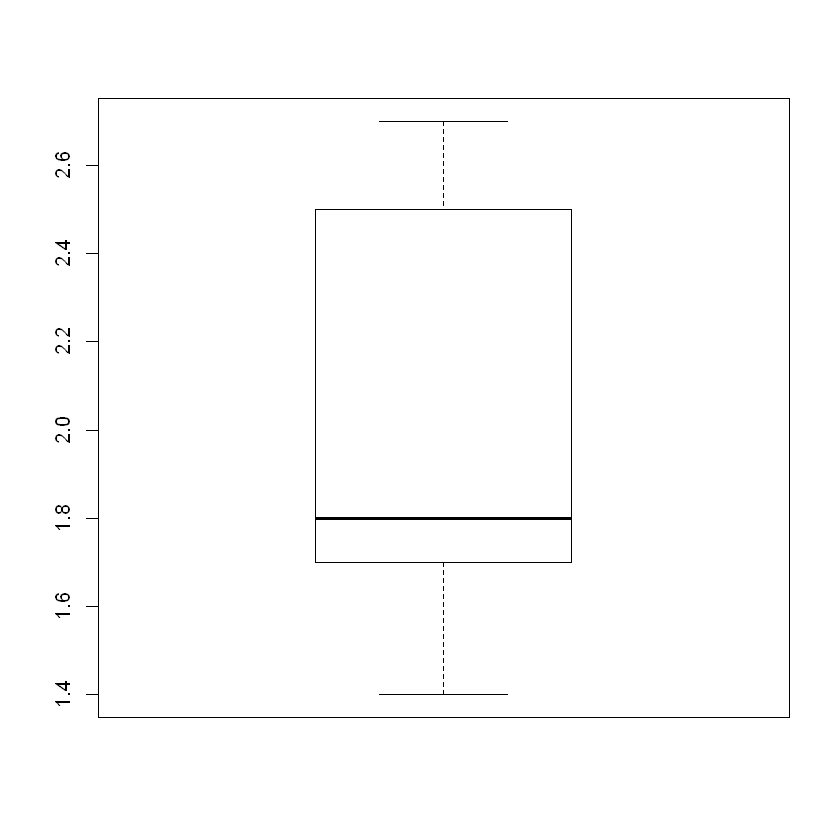

In [34]:
print('random sampling')
cat("mean: ", mean(random.sampling.mean.b),
   "variance: ",var(as.data.frame.table(random.sampling.mean.b)$Freq))
boxplot(as.data.frame.table(random.sampling.mean.b)$Freq)

[1] "degree random sampling"
mean:  3.93 variance:  1.491222

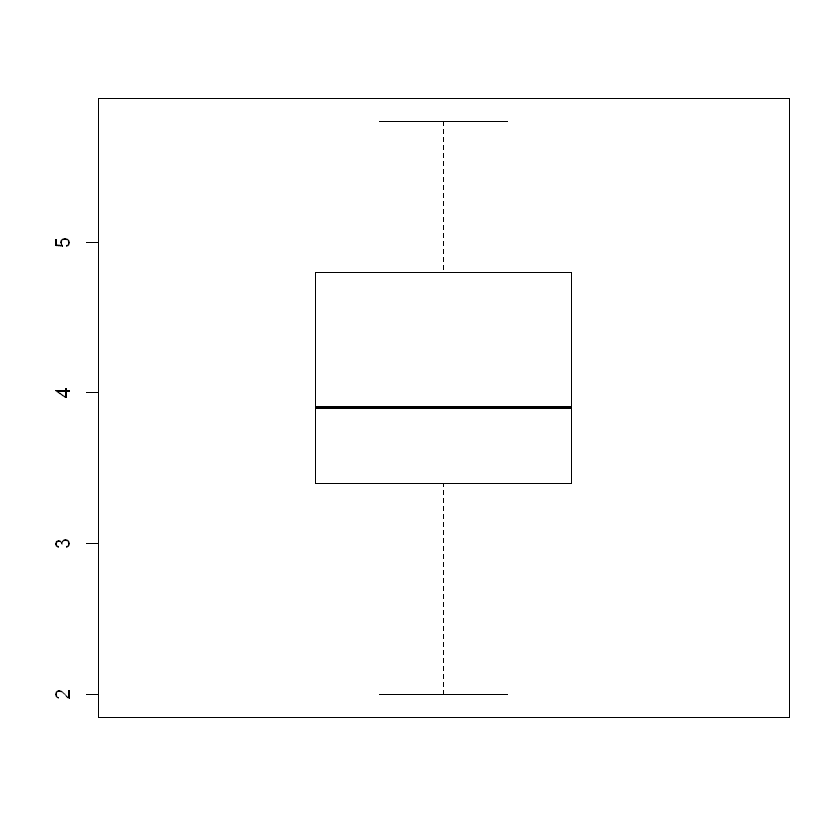

In [35]:
print('degree random sampling')
cat("mean: ", mean(degree.random.sampling.mean.b),
   "variance: ",var(as.data.frame.table(degree.random.sampling.mean.b)$Freq))
boxplot(as.data.frame.table(degree.random.sampling.mean.b)$Freq)

[1] "random walk random sampling"
mean:  2.874167 variance:  1.225346

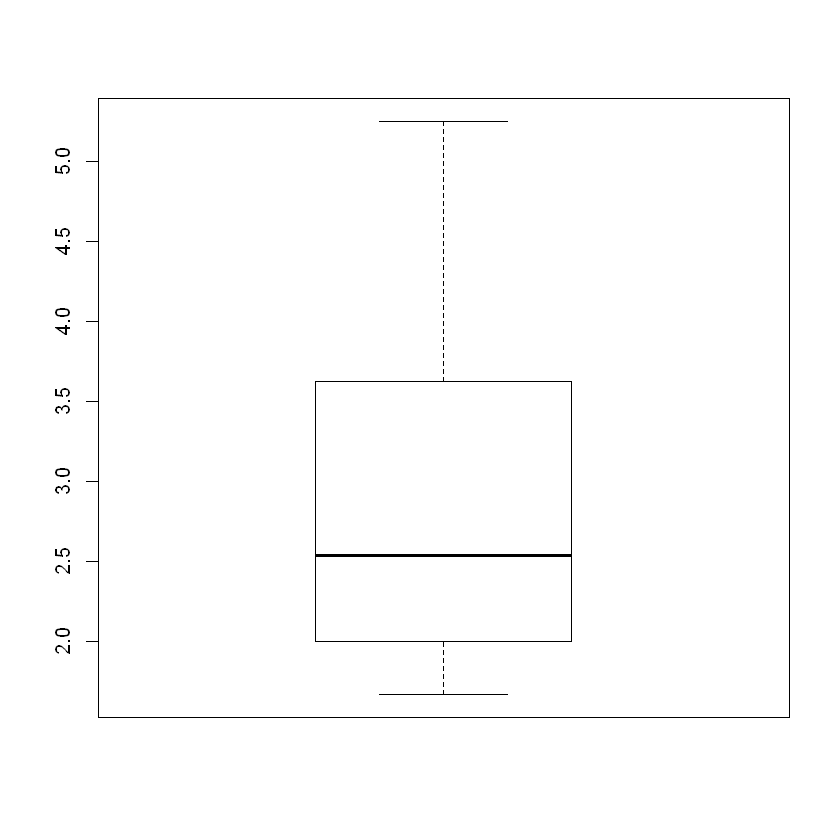

In [36]:
print('random walk random sampling')
cat("mean: ", mean(random.walk.random.sampling.mean.b),
   "variance: ",var(as.data.frame.table(random.walk.random.sampling.mean.b)$Freq))
boxplot(as.data.frame.table(random.walk.random.sampling.mean.b)$Freq)

- Same comments.
- The variance is much bigger this time for random walk and degree random sampling. It could be explained by the presence of different "groups" of nodes in the new graph. When a node is chosen, it's probable that the next nodes selected in future waves remain in the same group or neighboring group. This may result in a big difference from the average degree of the population.


# Estimation in Hidden Populations

The graph generated below contains nodes with two states ($1$ and $0$). Only 30 nodes are in state 1. We want to implement an estimator that will help us estimate the proportion of individual in state 1. 

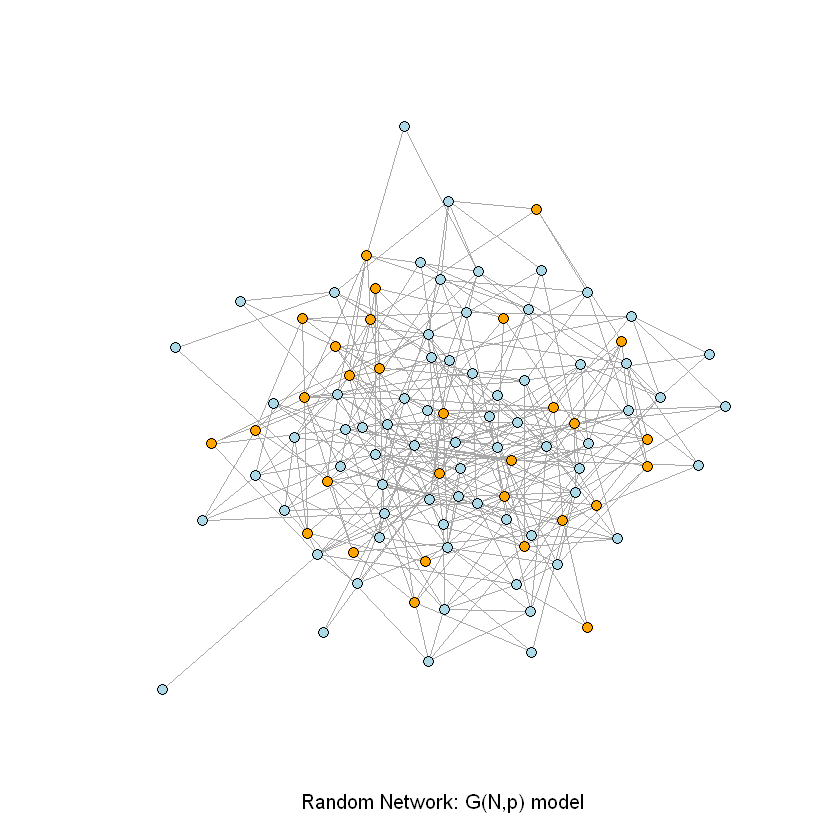

In [10]:
graph <- erdos.renyi.game(100, 0.07, type = "gnp")
sub.pop <- sample(1:100)[1:30]
g <-  as.matrix(as_adjacency_matrix(graph))
V(graph)$color<-"lightblue"
V(graph)$color[sub.pop]<-"orange"
plot(graph, vertex.label= NA, edge.arrow.size=0.02,vertex.size = 4, xlab = "Random Network: G(N,p) model")

*Random_walk_Random_sampling_modified(g,sub.pop,nb.sample)* is a function where when a node $i$ is sampled, it will provide the information of its degree and its state.

In [8]:
return_state_node <- function(node,sub.pop ){
  ifelse((node %in%  sub.pop) ,1,0)
}
Random_walk_Random_sampling_modified<-function(g,sub.pop, nb.sample){
    I<-dim(g)[1]
    # Initialization
    nodes<-c()
    i0<- sample(c(1:I),1,replace=TRUE)# initialization of the random walk
    nodes<-c(nodes,i0)
    degree.vec<-c()
    degree.vec<-c(degree.vec,sum(g[i0,]))
    state.vec <- c()
    state.vec <-c(state.vec,return_state_node(i0,sub.pop))
    for(n in 1:nb.sample){
        i1 <-sample(c(1:I),1,replace=TRUE,prob = g[i0,]/sum(g[i0,])) # Sampling the new state 
        if(sum(nodes==i1)>0){
            nodes <- nodes
            degree.vec <- degree.vec
            state.vec <- state.vec
        }
        else{
            nodes <- c(nodes,i1)
            degree.vec <- c(degree.vec,sum(g[i1,]))
            state.vec <- c(state.vec,return_state_node(i1,sub.pop ) )
        }
        i0 <- i1
    }
    return(list(nodes,degree.vec, state.vec))
}

In [11]:
Test <- Random_walk_Random_sampling_modified(g,sub.pop,100)


In [20]:
Test

[[1]]
 [1] 86 14 46 69 59 25 50 28 68 65 51 22 43 72 95 41  9 64 35  2 17 94 88 80 90
[26] 45 15 30  1 77 11 82 78 44 92  7 55 40  5 21 31 29  8 62 36 19 54 37

[[2]]
 [1]  7  6  6 13  5  6  5 10  7  9  9  5  6  7 11  8  9  6  4  7  6  5  9  5  6
[26]  7  4  9 14  8 11  9  5  8  5  6  4  7  9 11  9 11  7  6 12  4 10  8

[[3]]
 [1] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0
[39] 0 0 0 0 0 0 0 1 1 1

 Implementation of the estimator $P_{10}$ and $P_{01}$ 
$$
P_{0,1}=\frac{\sum_{k=1}^K1_{x(k)=0}1_{x(k+1)=1}}{\sum_{k=1}^K1_{x(k)=0}},
$$
where $x(k)$ is the state of the node visited at the $k$-th step of the random walk  and $1_{\cdot}$ is the indicator function.

In [12]:
Num10<-c()
Denom10<-c()
for(n in 1:(length(Test[[3]])-1)){
    Denom10<-c(Denom10,Test[[3]][n]==1)
    Num10<-c(Num10,(Test[[3]][n]==1)*(Test[[3]][n+1]==0))
}

Num01<-c()
Denom01<-c()
for(n in 1:(length(Test[[3]])-1)){
    Denom01<- c(Denom01,Test[[3]][n]==0)
    Num01<-c(Num01,(Test[[3]][n]==0)*(Test[[3]][n+1]==1))
}
P10 = sum(Num10)/ sum(Denom10) 
P01 = sum(Num01) / sum(Denom01)

In [27]:
c(P10,P01)

[1] 0.7272727 0.2500000

 Implementation of the estimator of the average degree of each subpopulation. Reminder:
$$ D_0=\frac{\sum_{k=1}^K1_{x(k)=0}}{\sum_{k=1}^K\frac{1_{x(k)=0}}{deg(i_k)}}$$
where $deg(i_k)$ is the degree of the node visited at the $k$-th step of the random walk.

In [28]:
Deg.0<-sum(Denom01)  / sum( as.numeric(ifelse(Denom01=="TRUE",1,0)) / array(as.numeric(unlist(Test[2]))) )
Deg.1<-sum(Denom10)  / sum(as.numeric(ifelse(Denom10=="TRUE",1,0)) / array(as.numeric(unlist(Test[2]))))

Warning message in as.numeric(ifelse(Denom01 == "TRUE", 1, 0))/array(as.numeric(unlist(Test[2]))):
"longer object length is not a multiple of shorter object length"Warning message in as.numeric(ifelse(Denom10 == "TRUE", 1, 0))/array(as.numeric(unlist(Test[2]))):
"longer object length is not a multiple of shorter object length"

In [29]:
Deg.1

[1] 6.128429

In [30]:
Deg.0

[1] 6.806198

In [32]:
Deg.0*P01/(Deg.0*P01+Deg.1*P10)

[1] 0.2762888

In [51]:
#200 samples : result from next cell
Deg.0*P01/(Deg.0*P01+Deg.1*P10)

[1] 0.3058673

we see that it's really near the real proportion ! 

In [50]:
Test2 <- Random_walk_Random_sampling_modified(g,sub.pop,200)
Num10<-c()
Denom10<-c()
for(n in 1:(length(Test2[[3]])-1)){
    Denom10<-c(Denom10,Test2[[3]][n]==1)
    Num10<-c(Num10,(Test2[[3]][n]==1)*(Test2[[3]][n+1]==0))
}

Num01<-c()
Denom01<-c()
for(n in 1:(length(Test2[[3]])-1)){
    Denom01<- c(Denom01,Test2[[3]][n]==0)#to complete 
    Num01<-c(Num01,(Test2[[3]][n]==0)*(Test2[[3]][n+1]==1)) #to complete 
}
P10 = sum(Num10)/ sum(Denom10)  #to complete 
P01 = sum(Num01) / sum(Denom01)  #to complete 
Deg.0<-sum(Denom01)  / sum( as.numeric(ifelse(Denom01=="TRUE",1,0)) / array(as.numeric(unlist(Test2[2]))) )
Deg.1<-sum(Denom10)  / sum(as.numeric(ifelse(Denom10=="TRUE",1,0)) / array(as.numeric(unlist(Test2[2]))))
print(Deg.0*P01/(Deg.0*P01+Deg.1*P10))

Warning message in as.numeric(ifelse(Denom01 == "TRUE", 1, 0))/array(as.numeric(unlist(Test2[2]))):
"longer object length is not a multiple of shorter object length"Warning message in as.numeric(ifelse(Denom10 == "TRUE", 1, 0))/array(as.numeric(unlist(Test2[2]))):
"longer object length is not a multiple of shorter object length"

[1] 0.3058673


In [49]:
Test3 <- Random_walk_Random_sampling_modified(g,sub.pop,1000)
Num10<-c()
Denom10<-c()
for(n in 1:(length(Test3[[3]])-1)){
    Denom10<-c(Denom10,Test3[[3]][n]==1)
    Num10<-c(Num10,(Test3[[3]][n]==1)*(Test3[[3]][n+1]==0))
}

Num01<-c()
Denom01<-c()
for(n in 1:(length(Test3[[3]])-1)){
    Denom01<- c(Denom01,Test3[[3]][n]==0)#to complete 
    Num01<-c(Num01,(Test3[[3]][n]==0)*(Test3[[3]][n+1]==1)) #to complete 
}
P10 = sum(Num10)/ sum(Denom10)  #to complete 
P01 = sum(Num01) / sum(Denom01)  #to complete 
Deg.0<-sum(Denom01)  / sum( as.numeric(ifelse(Denom01=="TRUE",1,0)) / array(as.numeric(unlist(Test3[2]))) )
Deg.1<-sum(Denom10)  / sum(as.numeric(ifelse(Denom10=="TRUE",1,0)) / array(as.numeric(unlist(Test3[2]))))
print(Deg.0*P01/(Deg.0*P01+Deg.1*P10))

Warning message in as.numeric(ifelse(Denom01 == "TRUE", 1, 0))/array(as.numeric(unlist(Test3[2]))):
"longer object length is not a multiple of shorter object length"Warning message in as.numeric(ifelse(Denom10 == "TRUE", 1, 0))/array(as.numeric(unlist(Test3[2]))):
"longer object length is not a multiple of shorter object length"

[1] 0.3018861


- When the number of samples increases the magnitude of the bias tends to be smaller 